In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import f1_score

from time import time

#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

In [2]:
db= pd.read_csv('student-intervention_data.csv')
db.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
db.shape

(395, 31)

In [4]:
db.columns.value_counts().sum()

31

In [5]:
db.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
db.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

# Data Exploration

### remove skewness from dataset by using feature transformation

In [7]:
db_numerics_only = db.select_dtypes(include=np.number)

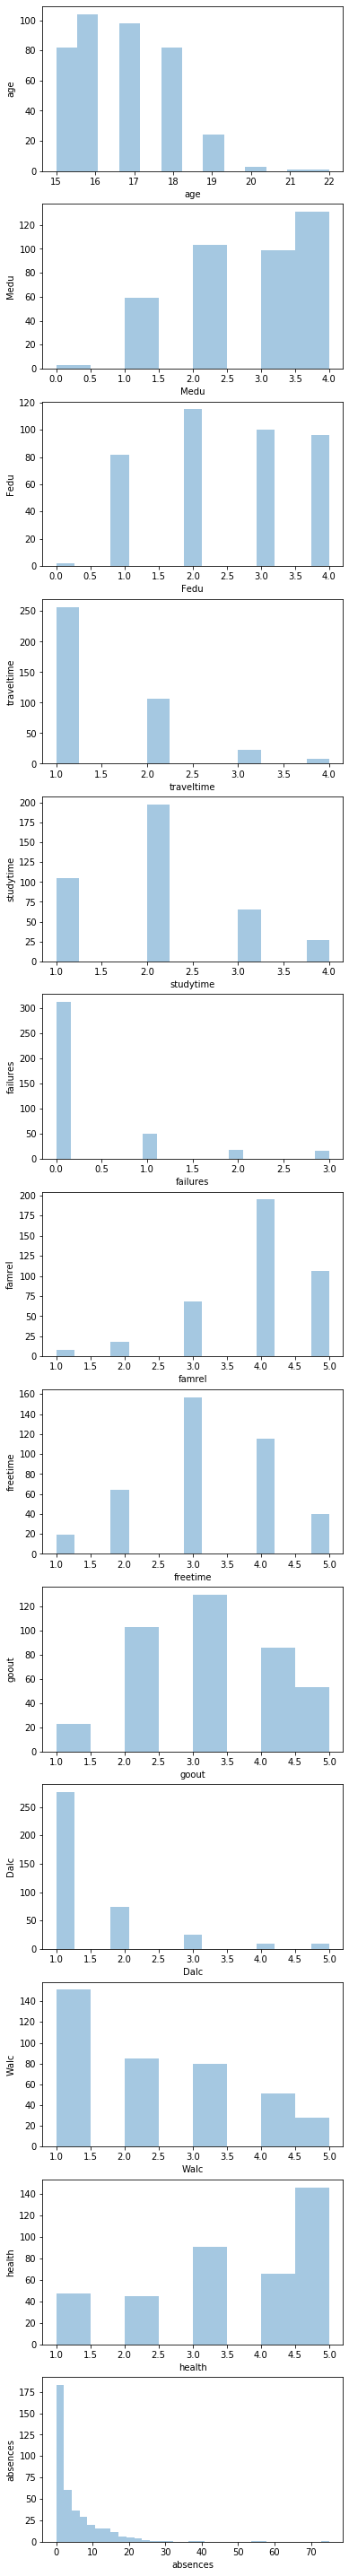

In [8]:
n=len(db_numerics_only.columns)
fig,ax = plt.subplots(n,1, figsize=(6,n*4))
#fig, ax = plt.subplots(n,1,2,figsize=(20,n*5))
for i in range(n):
    plt.sca(ax[i])
    col = db_numerics_only.columns[i]
    sns.distplot(db_numerics_only[col].dropna(),kde=False)
    plt.ylabel(col)

In [9]:
db.absences.unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17],
      dtype=int64)

Text(0.5, 0, 'cube_root-absences')

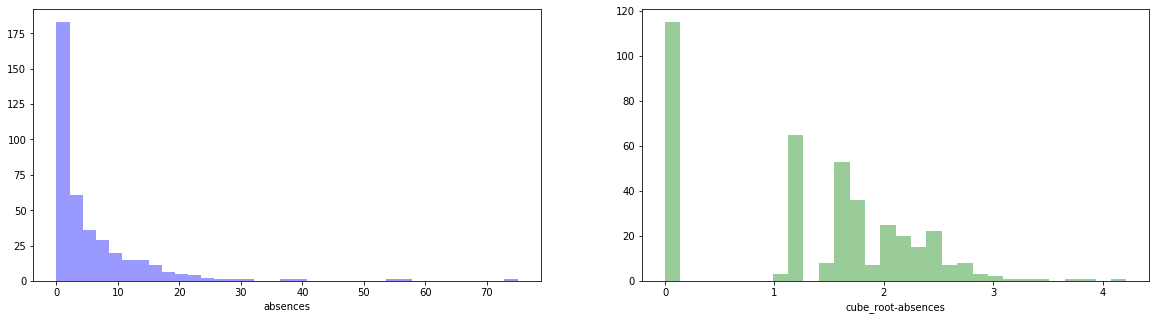

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(db.absences, ax=ax[0], kde=False, color="blue")
sns.distplot(np.cbrt(db.absences), ax=ax[1], bins=30, color="green", kde=False)
ax[1].set_xlabel("cube_root-absences")

In [11]:
# DO: Calculate number of students
total_students = db.shape[0]

# DO: Calculate number of features
all_features =db.columns.value_counts().sum()

# DO: Calculate passing students
# Data filtering using .loc[rows, columns]
total_pass = db.loc[db.passed == 'yes', 'passed']
n_pass = total_pass.shape[0]

# TODO: Calculate failing students
total_fail= db.loc[db.passed == 'no', 'passed']
n_fail= total_fail.shape[0]

# TODO: Calculate graduation rate
total = float(n_pass+ n_fail)
graduate_rate = float(n_pass * 100 / total)



In [12]:
# Print the results
print ("Total number of students: {}".format(total_students))
print( "Number of features: {}".format(all_features))
print ("Number of students who passed: {}".format(n_pass))
print ("Number of students who failed: {}".format(n_fail))
print( "Graduation rate of the class: {:.2f}%".format(graduate_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


<Figure size 720x720 with 0 Axes>

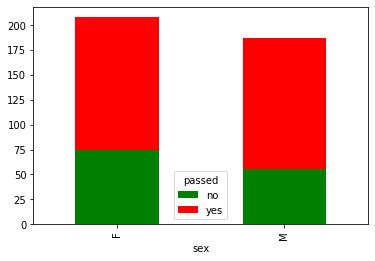

In [13]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['sex'],db['passed'])
dfq.plot(kind='bar', stacked= True ,color =['green','red'],grid=False)

<Figure size 720x720 with 0 Axes>

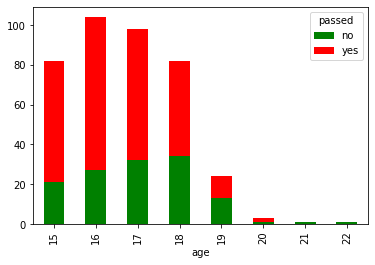

In [14]:
plt.figure(figsize=(10,10))
dfq = pd.crosstab(db['age'],db['passed'])
dfq.plot(kind='bar', stacked= True ,color =['green','red'],grid=False)

# Preprocessing

In [15]:
X=db.drop('passed',axis=1)
X['absences'] = np.cbrt(X.absences)
y=db['passed']

In [16]:
y.replace(['yes','no'],[1,0],inplace=True)

In [17]:
def preprocess_features(Z):
    # Preprocesses the student data and converts non-numeric binary variables into
        #binary (0  or 1) variables. Converts categorical variables into dummy variables.

    # Initialize new out DataFrame
    out = pd.DataFrame(index = Z.index)

    # Investigate each feature column for the data
    for col, col_data in Z.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        out = out.join(col_data)

    return out

X = preprocess_features(X)
print ("Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [18]:
X.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,1.817121
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,1.587401
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,2.154435
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,1.259921
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,1.587401


# Training and Testing Data Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=90, random_state=45)

In [21]:
# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 305 samples.
Testing set has 90 samples.


# Models evaluation

The following supervised learning models are currently available

1.K-Nearest Neighbors (KNeighbors)

2.Logistic Regression

3. Gaussian Naive Bayes (GaussianNB)

4. Decision Trees

5. Support Vector Machines (SVM)

# DATA OVERVIEW

1. Skewed classes:

~~ As we can see, there is almost twice as many students who passed compared to students who failed.

 1. Number of students who passed: 265 (majority class)

2. Number of students who failed: 130 (minority class)

~~ The training test can be populated with mostly the majority class and the testing set could be populated with the minority class. This would affect the accuracy calculated.

# Process

Run the code  below to initialize four helper functions which you can use for training and testing the three supervised learning models you have chosen above. The functions are as follows:

1. train_classifiers - takes as input a classifier and training data and fits the classifier to the data.

2. predict_label - takes as input a fit classifier, features, and a target labeling and makes predictions using the F1 score.

3. train_predict - takes as input a classifier, and the training and testing data, and performs train_clasifier and predict_labels.

In [24]:
def train_classifiers(clf, X_train, y_train):
    ''' Fit a classifier to the training data. '''

    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))


def predict_label(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    print ("Made predictions in {:.4f} seconds".format(end - start))
    return f1_score(target.values, y_pred, pos_label= 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''

    # Indicate the classifier and the training set size
    print ("")
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifiers(clf, X_train, y_train)

    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_label(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_label(clf, X_test, y_test)))

# Implementation: Model Performance 

In [25]:
##Import the three supervised learning models from sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# DO: Initialize the three models

clf_1 = GaussianNB()
clf_2 = LogisticRegression(random_state=42)
clf_3 = SVC(random_state=42)
clf_4 = DecisionTreeClassifier()
clf_5 = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )

# DO: Set up the training set sizes

X_train_100 = X_train.iloc[:100, :]
y_train_100 = y_train.iloc[:100]

X_train_200 = X_train.iloc[:200, :]
y_train_200 = y_train.iloc[:200]

X_train_300 = X_train.iloc[:300, :]
y_train_300 = y_train.iloc[:300]

# DO: Execute the 'train_predict' function for each classifier and each training set size

for clf in [clf_1, clf_2, clf_3, clf_4, clf_5]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


GaussianNB: 


Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds
F1 score for training set: 0.8209.
Made predictions in 0.0010 seconds
F1 score for test set: 0.6271.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds
F1 score for training set: 0.7732.
Made predictions in 0.0010 seconds
F1 score for test set: 0.6154.

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds
F1 score for training set: 0.8000.
Made predictions in 0.0010 seconds
F1 score for test set: 0.7176.

LogisticRegression: 


Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0130 seconds
Made predictions in 0.0010 seconds
F1 score for training set: 0.8837.
Made predictions in 0.0000 seconds
F1 score for test set: 0.6609.

Training a LogisticRegression using a

# find best parametrers using gridsearhCV and also check and remove overfitting and underfitting problem by using hyperparameter tuning

In [1]:
def Snippet(model, X_test, y_test,X_train,y_train,parameters): 
    
    print(format('How to find parameters using GridSearchCV  for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    #from sklearn import datasets
    #from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics.classification import accuracy_score
    from sklearn.metrics.classification import confusion_matrix
    #print(model,parameters)
    

    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2,refit=True,scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)   
    
    y_pred = grid.best_estimator_.predict(X_test)
    train_y_pred = grid.best_estimator_.predict(X_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, train_y_pred)
    test_conf = confusion_matrix (y_test, y_pred)
    train_conf = confusion_matrix (y_train, train_y_pred)
    
    class_report = classification_report(y_test,y_pred)
    y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
    plt.hist(y_pred_prob,bins=10)
    plt.xlim(0,1)
    plt.xlabel("Predicted Proababilities")
    plt.ylabel("Frequency")
   
    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
                                    
    print("\n The train_accuracy across ALL models:\n",
          train_acc)
                                    
    print("\n The test_accuracy across ALL models:\n",
          test_acc) 
    print("\n The train_confusion matrix across ALL models:\n",
          train_conf) 
    print("\n The test_confusion matrix across ALL models:\n",
          test_conf) 
    
    print("\n classification report across ALL models:\n",
          class_report) 
    
    print (plt.show())
    
    print("\n ========================================================")

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

 The best score across ALL searched params:
 0.7991781572459136

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}

 The train_accuracy across ALL models:
 0.8459016393442623

 The test_accuracy across ALL models:
 0.7111111111111111

 The train_confusion matrix across ALL models:
 [[ 

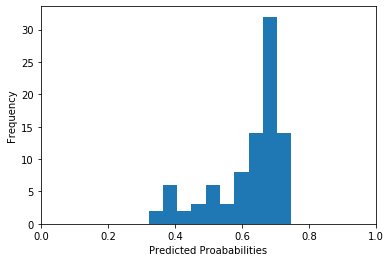

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best score across ALL searched params:
 0.8041522260730473

 The best parameters across ALL searched params:
 {'learning_rate': 0

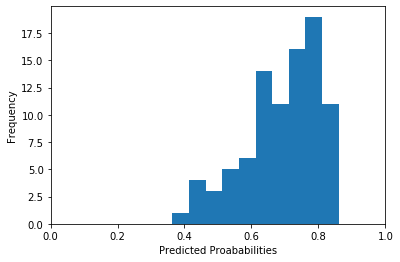

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.7966804979253113

 The best parameters across ALL searched params:
 {'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 4}

 The train_accuracy across ALL models:
 0.839344262295082

 The test_accuracy across ALL models:
 0.6666666

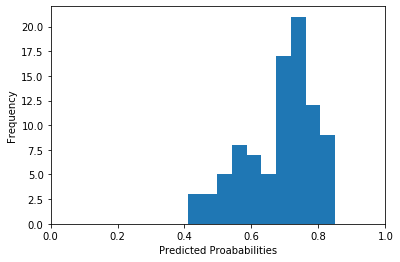

None

************How to find parameters using GridSearchCV  for Regression*************

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

 The best score across ALL searched params:
 0.8015748031496064

 The best parameters across ALL searched params:
 {'C': 1, 'kernel': 'rbf'}

 The train_accuracy across ALL models:
 0.6786885245901639

 The test_accuracy across ALL models:
 0.6666666666666666

 The train_confusion matrix across ALL models:
 [[  2  98]
 [  0 205]]

 The test_confusion matrix across ALL models:
 [[ 0 30]
 [ 0 60]]

 classification report across ALL models:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.67      1.00

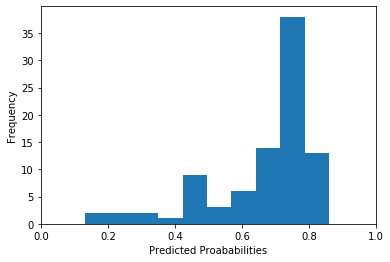

None



In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
alg = [XGBClassifier(),GradientBoostingClassifier(), RandomForestClassifier(),SVC(probability=True)]
parameters = [{'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]},
              
              { 'max_depth'    : [4,6,8],
                  'min_samples_split' : [2,3,4],
                  'max_features'    : ['auto','sqrt','log2']},
              
              {'kernel':['linear', 'rbf'], 
                'C':[1, 10]}
             ]


for i in range(len(alg)):
    #print(alg[i])
                              
    Snippet(alg[i] ,X_test, y_test,X_train,y_train,parameters[i])

#### here , we can see that the GradientBoosting model has best score and their actual and predicted probability values are nearby same as campare to other models.. 

## bar plot of features importances

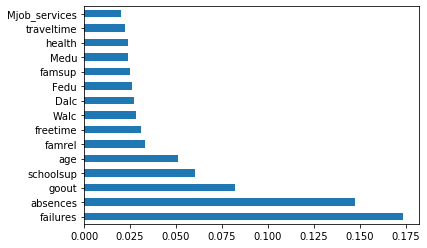

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(15)
feat_importances.plot(kind='barh')

from this graph we can see that the most important feature for this model is 'failures'.

## save model

In [23]:
import pickle

In [24]:
filename='student-intervention_GradientBoostingRegressor_model.sav'

In [25]:
pickle.dump(model, open(filename, 'wb'))

In [26]:
load_lr_model =pickle.load(open(filename, 'rb'))